# World Military Strength Ranking Data

Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled.

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from __future__ import print_function, division
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import numpy as np

### Importing the Data

In [64]:
df = pd.read_csv('Military_DataSet.csv')

In [65]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Country                   133 non-null    object
 1   Rank                      133 non-null    int64 
 2   Total_Military_Personnel  133 non-null    int64 
 3   Total_Aircraft_Strength   133 non-null    int64 
 4   Total_Naval_Assets        133 non-null    int64 
 5   Submarines                133 non-null    int64 
 6   Defense_Budget            133 non-null    int64 
 7   Rocket_Projectors         133 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 8.4+ KB
None


### Histograms of variables

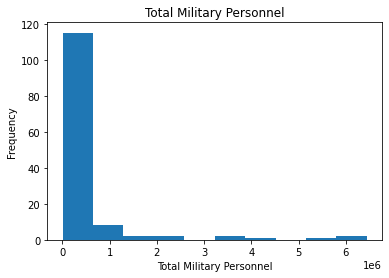

In [66]:
# Plotting histogram of 'Total Military Personnel' variable
Total_Military_Personnel = df['Total_Military_Personnel']
plt.hist(Total_Military_Personnel)
plt.xlabel('Total Military Personnel')
plt.ylabel('Frequency')
plt.title('Total Military Personnel')
plt.show()

In [67]:
# Descriptive statistics - Total_Military_Personnel
print('Mean:', df.Total_Military_Personnel.mean())
print('Mode:', df.Total_Military_Personnel.mode().values)
print('Variance:', df.Total_Military_Personnel.var())
print('Standard Deviation:', df.Total_Military_Personnel.std())

Mean: 449237.4210526316
Mode: [15500]
Variance: 1124107641813.8967
Standard Deviation: 1060239.42664565


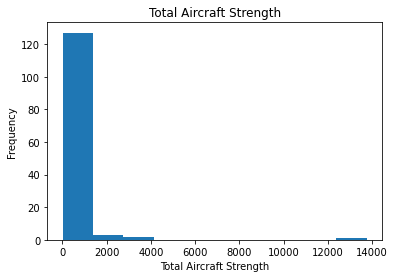

In [68]:
# Plotting histogram of 'Total_Aircraft_Strength' variable
Total_Aircraft_Strength = df['Total_Aircraft_Strength']
plt.hist(Total_Aircraft_Strength)
plt.xlabel('Total Aircraft Strength')
plt.ylabel('Frequency')
plt.title('Total Aircraft Strength')
plt.show()

In [69]:
# Descriptive statistics - Total_Aircraft_Strength
print('Mean:', df.Total_Aircraft_Strength.mean())
print('Mode:', df.Total_Aircraft_Strength.mode().values)
print('Variance:', df.Total_Aircraft_Strength.var())
print('Standard Deviation:', df.Total_Aircraft_Strength.std())

Mean: 395.42857142857144
Mode: [25]
Variance: 1633522.6709956722
Standard Deviation: 1278.0933733478444


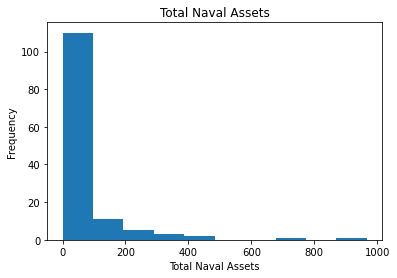

In [70]:
# Plotting histogram of 'Total_Naval_Assets' variable
Total_Naval_Assets = df['Total_Naval_Assets']
plt.hist(Total_Naval_Assets)
plt.xlabel('Total Naval Assets')
plt.ylabel('Frequency')
plt.title('Total Naval Assets')
plt.show()

In [71]:
# Descriptive statistics - Total_Naval_Assets
print('Mean:', df.Total_Naval_Assets.mean())
print('Mode:', df.Total_Naval_Assets.mode().values)
print('Variance:', df.Total_Naval_Assets.var())
print('Standard Deviation:', df.Total_Naval_Assets.std())

Mean: 69.54135338345864
Mode: [0]
Variance: 15758.73501936661
Standard Deviation: 125.53380030639799


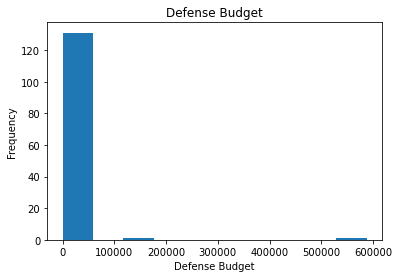

In [72]:
# Plotting histogram of 'Defense_Budget' variable
Defense_Budget = df['Defense_Budget']
plt.hist(Defense_Budget)
plt.xlabel('Defense Budget')
plt.ylabel('Frequency')
plt.title('Defense Budget')
plt.show()

In [73]:
# Descriptive statistics - Defense_Budget
print('Mean:', df.Defense_Budget.mean())
print('Mode:', df.Defense_Budget.mode().values)
print('Variance:', df.Defense_Budget.var())
print('Standard Deviation:', df.Defense_Budget.std())

Mean: 11553.827067669174
Mode: [ 120 7000]
Variance: 2843346736.5228977
Standard Deviation: 53323.04132851856


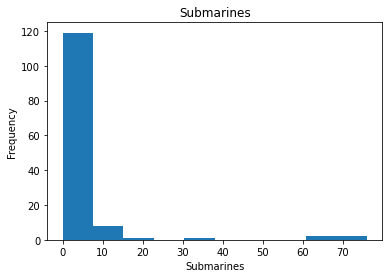

In [74]:
# Plotting histogram of 'Submarines' variable
Submarines = df['Submarines']
plt.hist(Submarines)
plt.xlabel('Submarines')
plt.ylabel('Frequency')
plt.title('Submarines')
plt.show()

In [75]:
# Descriptive statistics - Submarines
print('Mean:', df.Submarines.mean())
print('Mode:', df.Submarines.mode().values)
print('Variance:', df.Submarines.var())
print('Standard Deviation:', df.Submarines.std())

Mean: 4.030075187969925
Mode: [0]
Variance: 152.90817953975872
Standard Deviation: 12.365604697699126


## PMF

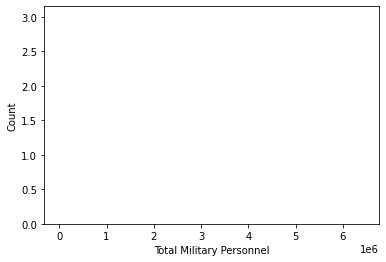

In [76]:
hist = thinkstats2.Hist(Total_Military_Personnel, label='Total Military Personnel')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Total Military Personnel', ylabel='Count')

In [77]:
n = hist.Total()
pmf = hist.Copy()
for x, freq in hist.Items():
    pmf[x] = freq / n


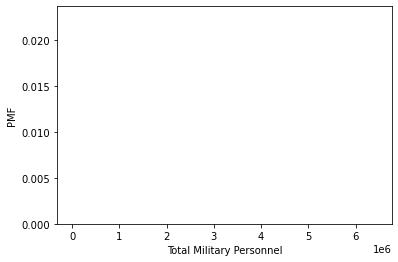

In [78]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Total Military Personnel', ylabel='PMF')

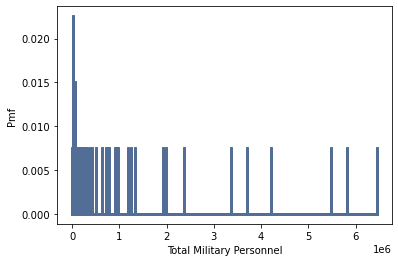

In [79]:
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Total Military Personnel', ylabel='Pmf')


This PMF is for the number of military personnel of the country. Looking at the PMF we see that the there is more chance of seeing that most of the country has the total military which less than 0.5 million. There is more number of country that has less number of military than the country that have high number of military personnel.

## CDF

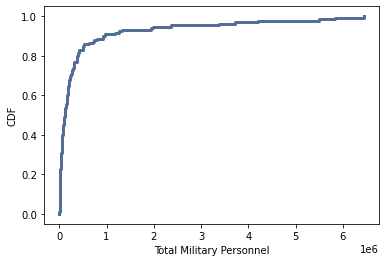

In [80]:
# Plotting CDF of Total_Military_Personnel
personnel_cdf = thinkstats2.Cdf(df.Total_Military_Personnel, label='Total Military Personnel')
thinkplot.Cdf(personnel_cdf)
thinkplot.Config(xlabel='Total Military Personnel', ylabel='CDF', loc='upper left')

The CDF for the Total_Military_variable shows that the most common number is around the left side of the graph. Most country has the value less than 0.25 million so I would say the common number is 0.25 million. The highest value is around 4-5 million. 

## Analytical Distribution

#### 1. Normal Distribution

Mean: 449237.4210526316
Var: 1115655704657.4016
Sigma: 1056246.043617396


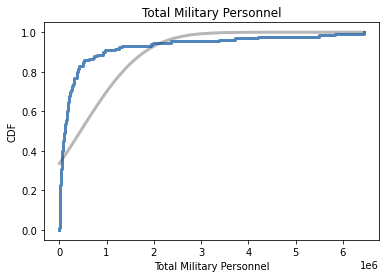

In [81]:
Personnel = df.Total_Military_Personnel

# Estimating parameters
mu, var = thinkstats2.MeanVar(Personnel)
print('Mean:', mu)
print('Var:', var)
    
# Plotting the model
sigma = np.sqrt(var)
print('Sigma:', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=3000, high=6445000)

thinkplot.Plot(xs, ps, label='model', color='0.6')

# Plotting the data
cdf = thinkstats2.Cdf(Total_Military_Personnel, label='Total Military Personnel')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='Total Military Personnel',
                 xlabel='Total Military Personnel',
                 ylabel='CDF')

The curve for the total military personnel deviates from the expected model because most of our data are concentrated in the left and there are very few countries in the right. Since we have very few record in the right the model and the actual curve are not lining together. 

#### 2. Normal Probability Plot

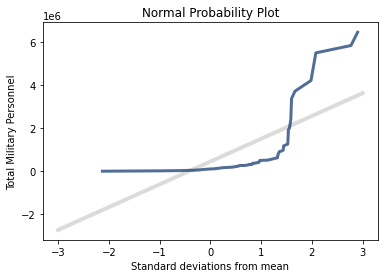

In [82]:
mean, var = thinkstats2.MeanVar(Personnel)
std = np.sqrt(var)

xs = [-3, 3]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(Personnel)
thinkplot.Plot(xs, ys, label='Total Military Personnel')

thinkplot.Config(title='Normal Probability Plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Total Military Personnel')

The normality probability plot shows us that the data lacks the normality where the tails are deviated very much from the model and the curve is not linear. 

## Scatterplots

#### Total Military Personnel Vs Defense Budget

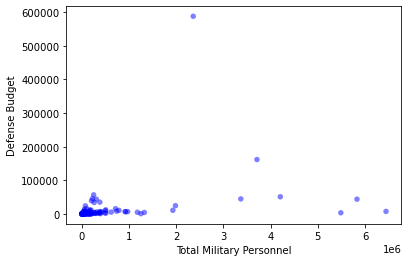

<Figure size 576x432 with 0 Axes>

In [83]:
thinkplot.Scatter(df.Total_Military_Personnel, df.Defense_Budget, alpha=0.5)
thinkplot.Config(xlabel='Total Military Personnel',
                 ylabel='Defense Budget',
                 legend=False)

thinkplot.show()

#### Total Naval Assets Vs Total Aircraft Strength

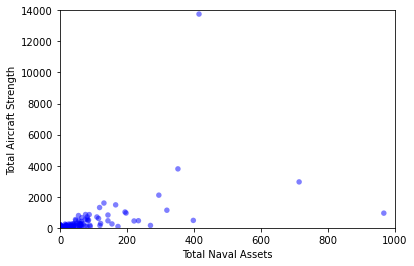

<Figure size 576x432 with 0 Axes>

In [84]:
thinkplot.Scatter(df.Total_Naval_Assets, df.Total_Aircraft_Strength, alpha=0.5)
thinkplot.Config(xlabel='Total Naval Assets',
                 ylabel='Total Aircraft Strength',
                 axis=[0, 1000, 0, 14000],
                 legend=False)

thinkplot.show()

#### Covariance

In [85]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [86]:
# Defense_Budget vs Total_Military_Personnel covariance
Cov(Defense_Budget, Total_Military_Personnel )

16825070335.208147

In [87]:
 # Total_Naval_Assets Vs Total_Aircraft_Strength covariance
Cov(Total_Naval_Assets, Total_Aircraft_Strength)

75930.24167561764

#### Pearson's Correlation

In [88]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [89]:
# Defense_Budget vs Total_Military_Personnel 
Corr(Defense_Budget, Total_Military_Personnel )

0.2998580664507558

In [90]:
 # Total_Naval_Assets Vs Total_Aircraft_Strength
Corr(Total_Naval_Assets, Total_Aircraft_Strength)

0.4768362153487483

Looking at the Pearsons coefficient of correlation we see that there is sligtly positive correlation between Defense_Budget and Total_Military_Personnel and also between Total_Naval_Assets and Total_Aircraft_Strength. 

####  Spearman's Correlation

In [91]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [92]:
# Defense_Budget vs Total_Military_Personnel 
SpearmanCorr(Defense_Budget, Total_Military_Personnel )

0.6942071717708785

In [93]:
 # Total_Naval_Assets Vs Total_Aircraft_Strength
SpearmanCorr(Total_Naval_Assets, Total_Aircraft_Strength)

0.7330665081116708

Spearman coefficient shows that there is strong correlation  for this two cases. 

In [94]:
Corr(np.log(Defense_Budget), np.log(Total_Military_Personnel) )

0.698860464625414

In [95]:
Corr((Total_Naval_Assets),np.log( Total_Aircraft_Strength))

0.5691681874099528

#### Hypothesis Testing

The null hypothesis is that there is no relationship between defense budget and total military personnel for a country

In [96]:
class CorrelationPermute(thinkstats2.HypothesisTest):
    """Tests correlations by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: tuple of xs and ys
        """
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [97]:
# Running correlation test on data subset
corr_data = Total_Military_Personnel, Defense_Budget
corr_test = CorrelationPermute(corr_data)
pvalue = corr_test.PValue()

print ('pvalue: ', pvalue)

pvalue:  0.024


A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Here we have p value equal to 0.03, that means we have strong evidence against the null hypothesis hence there is relationship between the total military personnel and the defense budget.

### Regression Analysis

In [98]:
import statsmodels.formula.api as smf

In [99]:
# Simple Linear Regression of defense budget as a function of total military personnel
formula = 'Defense_Budget ~ Total_Military_Personnel'
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Defense_Budget   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     12.94
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           0.000454
Time:                        15:45:06   Log-Likelihood:                -1629.5
No. Observations:                 133   AIC:                             3263.
Df Residuals:                     131   BIC:                             3269.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 4778.9312   4811.569      0.993      0.322   -4739.499    1.43e+04
Total_Military_Personnel     0.0151      0.004      3.598      0.000       0.007       0.023
==============================================================================
Omnibus:                      261.675   Durbin-Watson:                   1.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56978.184
Skew:                           9.456   Prob(JB):                         0.00
Kurtosis:                     102.620   Cond. No.                     1.25e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The higher the R-squared, the better the model fits our data. R square indicate the percentage of the variance in the dependent variable that the independent variables explain collectively. Here we see that R squared value to be 0.09 that means 9% variance is done by total military personnel count  towards the defense budget.

This means that military personnel count only count for 9% relation towards the defense budget and we can tell that there are other factors that affects the defense budget like the military combat equipment, maintenance and mission. 